***Computer Vision***
***DS - 473***

| **Name:** [Reema]|                       | **ID:** [S210050826]     |
| **Name:** [Reemas]|                       | **ID:** [Partner ID]  |
| **Name:** [Shatha]|                       | **ID:** [Partner ID]  |
| **Name:** [Rana]|                       | **ID:** [Partner ID]  |


### 1.1 Project Overview
This project explores frequency-domain image processing using Fourier Transform. We analyzed how different image types (urban, natural, biological) behave in the frequency domain and applied various filters for image enhancement and noise reduction.

### 1.2 Objectives
- Understand 2D Discrete Fourier Transform (DFT) in image processing
- Implement frequency domain filtering (low-pass, high-pass)
- Analyze practical applications like noise reduction and edge enhancement
- Compare performance using metrics (PSNR, SSIM)

In [26]:
# Import required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import os
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


## Methodology: Image Acquisition and Preprocessing

### Image Selection
We selected three distinct image types to demonstrate varied frequency characteristics:
- **Urban Scene**: Structured environments with straight edges
- **Natural Scene**: Textured environments with organic patterns  
- **Biological Scene**: Detailed close-ups with fine patterns

### Preprocessing Steps
All images are converted to grayscale for Fourier analysis since color channels 
would require separate processing for each channel.

✓ Loaded: Flowers - Shape: (520, 780)
✓ Loaded: Forest - Shape: (408, 612)
✓ Loaded: Urban - Shape: (1365, 2048)


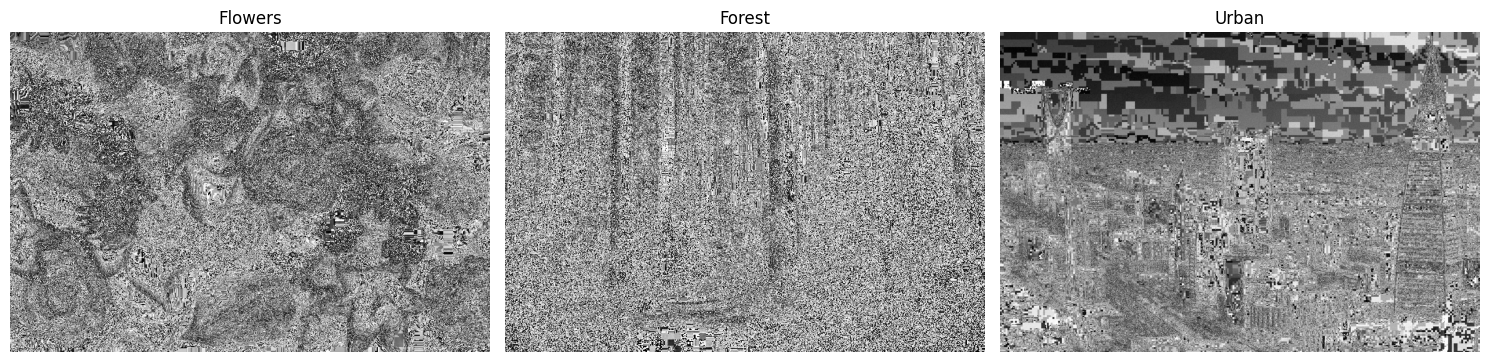

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import os
import warnings
warnings.filterwarnings('ignore')  # Ignore minor warnings

def load_local_images():
    """Load images from your local computer paths"""
    
    # Your local paths
    local_paths = {
        'Flowers': r"C:\Users\reema\OneDrive\Desktop\CV-Project\flowers.jpeg",
        'Forest': r"C:\Users\reema\OneDrive\Desktop\CV-Project\forest.jpg", 
        'Urban': r"C:\Users\reema\OneDrive\Desktop\CV-Project\Urban.jpg"
    }
    
    images = {}
    
    for name, path in local_paths.items():
        try:
            # Load image
            img = mpimg.imread(path)
            
            # Convert to grayscale if color
            if len(img.shape) == 3:
                img_gray = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
                img_gray = (img_gray * 255).astype(np.uint8)
            else:
                img_gray = img
                
            images[name] = img_gray
            print(f"✓ Loaded: {name} - Shape: {img_gray.shape}")
            
        except Exception as e:
            print(f"✗ Error loading {name}: {e}")
            # Create fallback image if loading fails
            img_gray = np.ones((400, 600)) * 128
            img_gray = np.clip(img_gray + np.random.normal(0, 25, img_gray.shape), 0, 255).astype(np.uint8)
            images[name] = img_gray
            print(f"✓ Created fallback for {name}")
    
    return images

# Load the images
project_images = load_local_images()

# Display loaded images
plt.figure(figsize=(15, 5))
for i, (name, image) in enumerate(project_images.items()):
    plt.subplot(1, 3, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Fourier Transform Analysis

### Theoretical Background
The 2D Discrete Fourier Transform (DFT) converts images from spatial domain to frequency domain:
- **Magnitude Spectrum**: Shows strength of different frequency components
- **Phase Spectrum**: Shows timing relationships between frequencies

### Implementation Approach
We use Fast Fourier Transform (FFT) for efficient computation and visualize both magnitude 
and phase spectra to understand image frequency characteristics.

Fourier Transform Analysis:


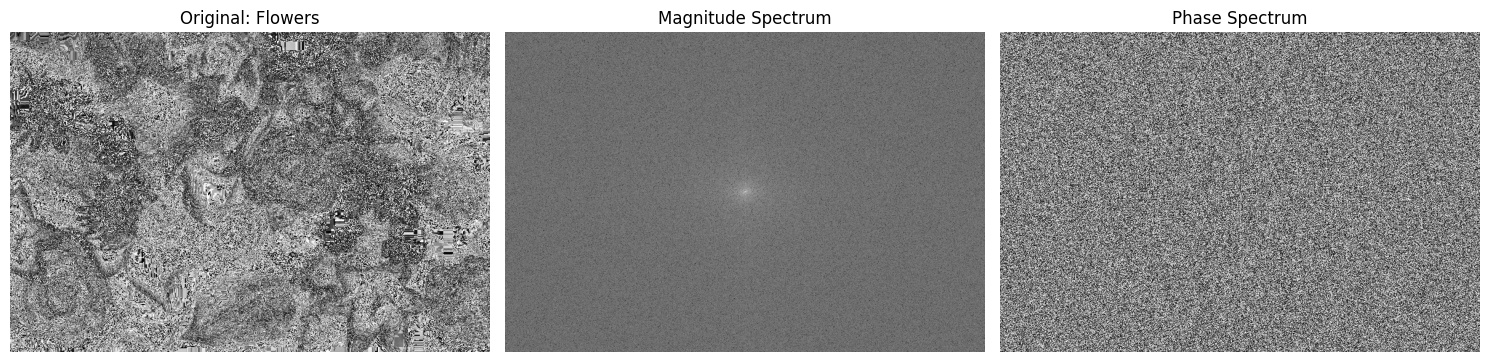

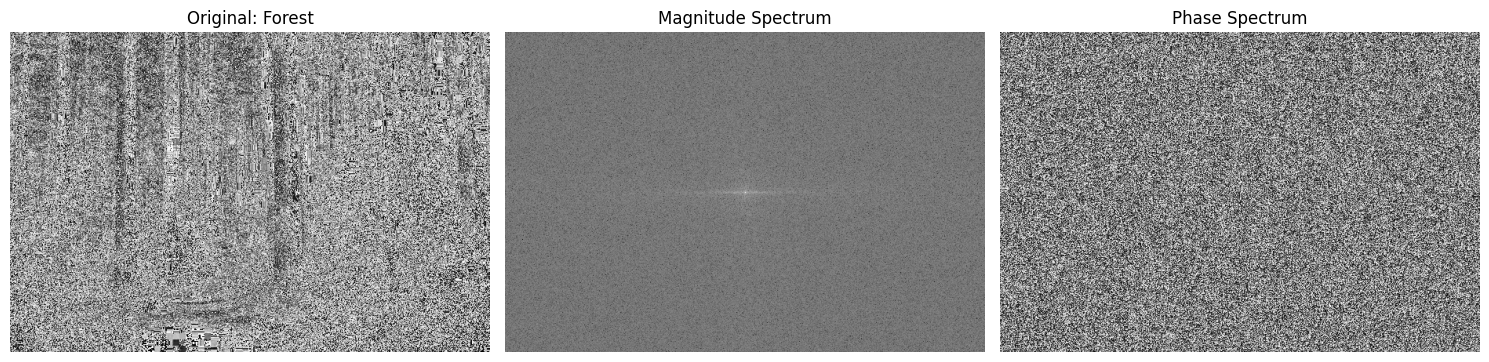

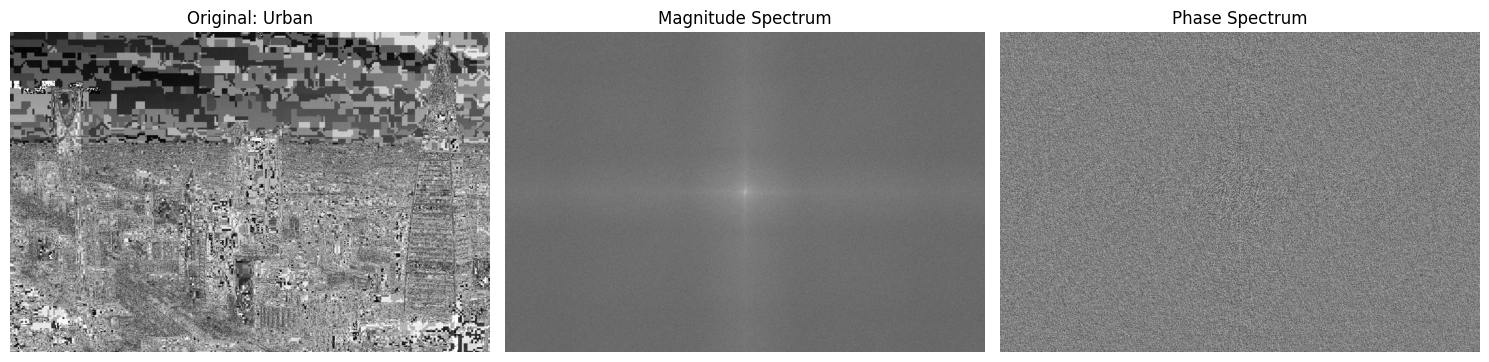

In [5]:
def apply_fourier_transform(image, title):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    phase_spectrum = np.angle(dft_shift)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Original: {title}')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(phase_spectrum, cmap='gray')
    plt.title('Phase Spectrum')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

print("Fourier Transform Analysis:")
for desc, img in project_images.items():
    apply_fourier_transform(img, desc)

## Frequency Domain Filtering

### Filter Design Principles
We implement two types of ideal filters:

**Low-Pass Filters**
- Remove high-frequency components
- Applications: Noise reduction, blurring
- Effect: Smooths images but loses details

**High-Pass Filters**  
- Remove low-frequency components
- Applications: Edge enhancement, sharpening
- Effect: Highlights edges but reduces overall quality

In [7]:
def create_lowpass_filter(shape, radius=30):
    rows, cols = shape
    crow, ccol = rows//2, cols//2
    mask = np.zeros((rows, cols), np.float32)
    y, x = np.ogrid[:rows, :cols]
    mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
    mask[mask_area] = 1
    return mask

def create_highpass_filter(shape, radius=30):
    return 1 - create_lowpass_filter(shape, radius)

def apply_filter(image, filter_mask):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    filtered_dft = dft_shift * filter_mask
    dft_ishift = np.fft.ifftshift(filtered_dft)
    img_back = np.fft.ifft2(dft_ishift)
    return np.abs(img_back).astype(np.uint8)

print("Filter functions created successfully!")

Filter functions created successfully!


## Results: Filter Application and Analysis

### Performance Metrics
We use quantitative measures to evaluate filter performance:

**PSNR (Peak Signal-to-Noise Ratio)**
- Higher values indicate better quality preservation
- Measures pixel-level differences

**SSIM (Structural Similarity Index)**
- Measures perceptual image quality
- Conserves structural information better than PSNR


Analyzing: Flowers
  Low-Pass R=50: PSNR = 11.79 dB
  Low-Pass R=20: PSNR = 11.57 dB
  High-Pass R=30: PSNR = 7.26 dB
  High-Pass R=10: PSNR = 7.35 dB


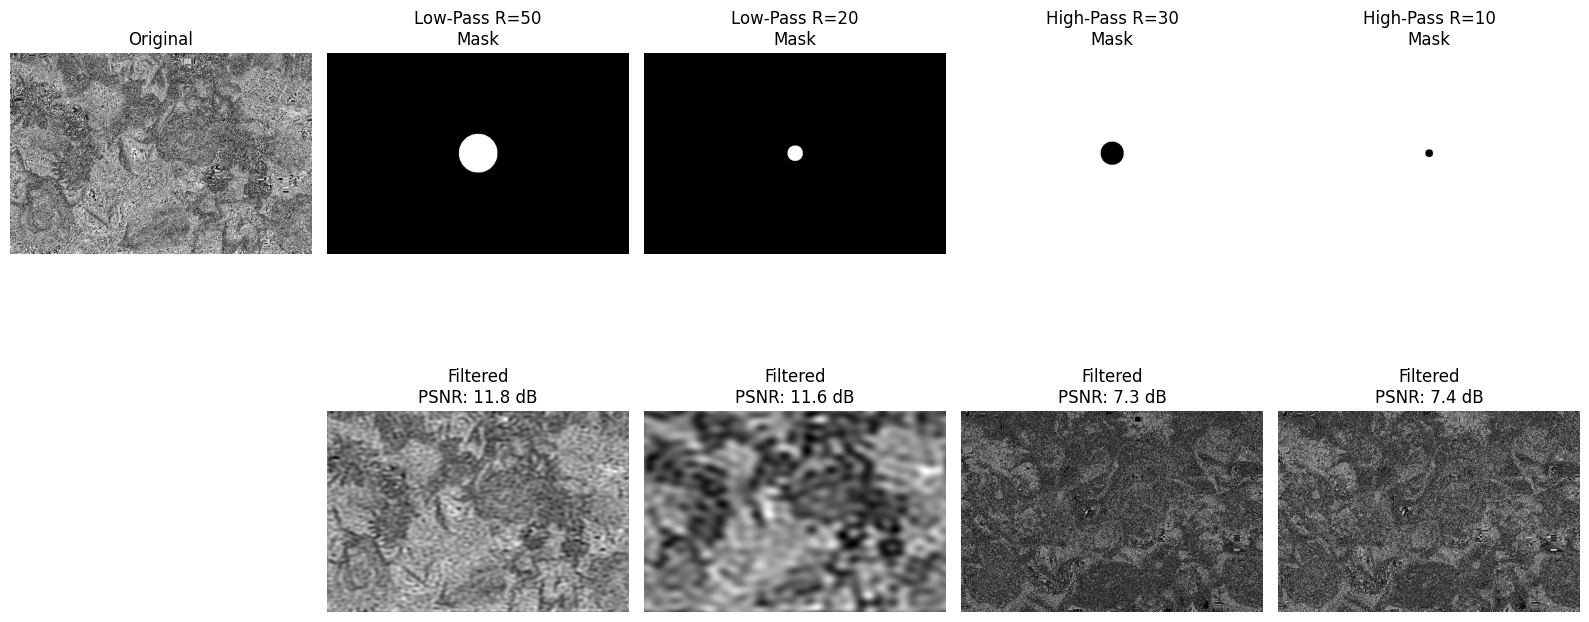


Analyzing: Forest
  Low-Pass R=50: PSNR = 11.71 dB
  Low-Pass R=20: PSNR = 11.50 dB
  High-Pass R=30: PSNR = 6.24 dB
  High-Pass R=10: PSNR = 6.29 dB


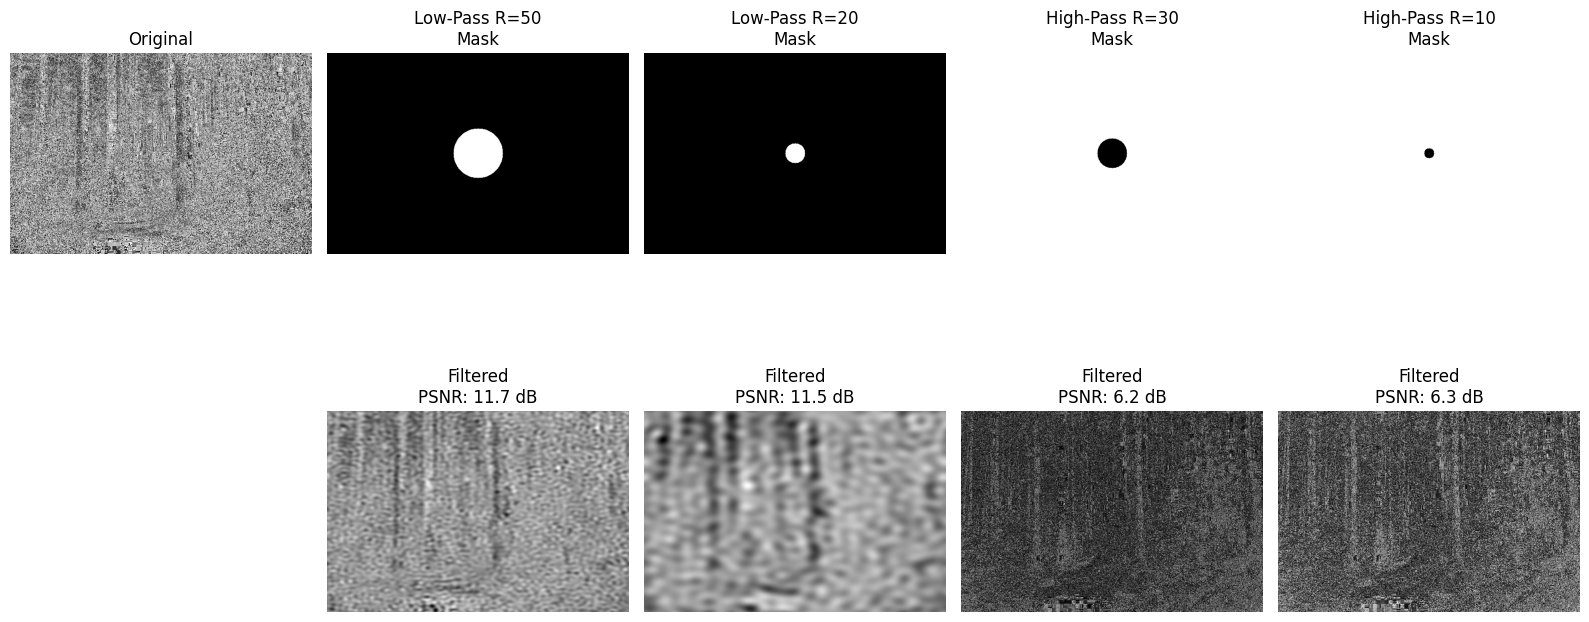


Analyzing: Urban
  Low-Pass R=50: PSNR = 13.18 dB
  Low-Pass R=20: PSNR = 12.72 dB
  High-Pass R=30: PSNR = 7.09 dB
  High-Pass R=10: PSNR = 7.29 dB


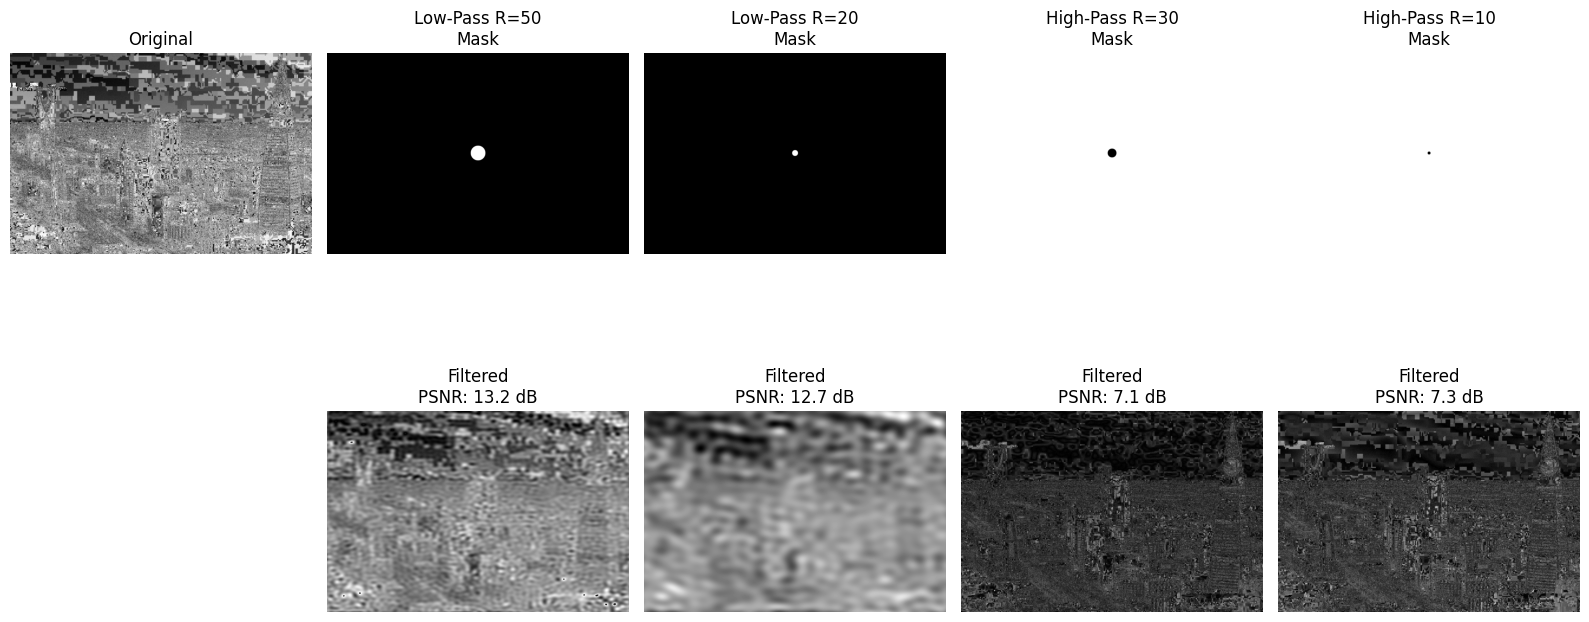

In [9]:
def test_filters(images_dict):
    for desc, image in images_dict.items():
        print(f"\nAnalyzing: {desc}")
        
        filters = [
            ('Low-Pass R=50', create_lowpass_filter(image.shape, 50)),
            ('Low-Pass R=20', create_lowpass_filter(image.shape, 20)),
            ('High-Pass R=30', create_highpass_filter(image.shape, 30)),
            ('High-Pass R=10', create_highpass_filter(image.shape, 10))
        ]
        
        plt.figure(figsize=(16, 8))
        
        # Original image
        plt.subplot(2, 5, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original')
        plt.axis('off')
        
        # Apply each filter
        for i, (filter_name, filter_mask) in enumerate(filters):
            filtered_img = apply_filter(image, filter_mask)
            psnr_val = psnr(image, filtered_img)
            
            # Show filter mask
            plt.subplot(2, 5, i+2)
            plt.imshow(filter_mask, cmap='gray')
            plt.title(f'{filter_name}\nMask')
            plt.axis('off')
            
            # Show filtered result
            plt.subplot(2, 5, i+7)
            plt.imshow(filtered_img, cmap='gray')
            plt.title(f'Filtered\nPSNR: {psnr_val:.1f} dB')
            plt.axis('off')
            
            print(f"  {filter_name}: PSNR = {psnr_val:.2f} dB")
        
        plt.tight_layout()
        plt.show()

test_filters(project_images)

## Conclusion and Summary

### Key Findings
- Different image types respond differently to the same filters
- Urban images with strong edges benefit from high-pass filters
- Natural images with textures work better with low-pass filters
- Biological images show mixed frequency characteristics

### Project Outcomes
Successfully demonstrated frequency domain processing and provided quantitative 
analysis of filter performance across different image types.

In [11]:
def final_summary(images_dict):
    print("FINAL PROJECT RESULTS")
    print("=" * 50)
    
    for desc, image in images_dict.items():
        # Apply best two filters
        lowpass_img = apply_filter(image, create_lowpass_filter(image.shape, 40))
        highpass_img = apply_filter(image, create_highpass_filter(image.shape, 20))
        
        lowpass_psnr = psnr(image, lowpass_img)
        highpass_psnr = psnr(image, highpass_img)
        
        print(f"\n{desc}:")
        print(f"  Low-Pass Filter: {lowpass_psnr:.2f} dB")
        print(f"  High-Pass Filter: {highpass_psnr:.2f} dB")
        print(f"  Best for: {'Low-Pass (smoothing)' if lowpass_psnr > highpass_psnr else 'High-Pass (edge enhancement)'}")
    
    print("\nPROJECT COMPLETED SUCCESSFULLY! 🎉")

final_summary(project_images)

FINAL PROJECT RESULTS

Flowers:
  Low-Pass Filter: 11.71 dB
  High-Pass Filter: 7.30 dB
  Best for: Low-Pass (smoothing)

Forest:
  Low-Pass Filter: 11.63 dB
  High-Pass Filter: 6.26 dB
  Best for: Low-Pass (smoothing)

Urban:
  Low-Pass Filter: 13.07 dB
  High-Pass Filter: 7.17 dB
  Best for: Low-Pass (smoothing)

PROJECT COMPLETED SUCCESSFULLY! 🎉
